# <center> R1.04 Méthodes d'optimisation <br> TP1a - Descente de gradient 1D </center>
<center> 2022/2023 - Thibault Godin & Lucie Naert </center>
<center> IUT de Vannes, BUT Informatique </center>

Le but de ce TP est d'implémenter quelques méthodes numériques d'optimisation, basées sur la descente de gradient, dont le cœur est résumé par :

$$a_{k+1} = a_k -  \delta f'(a_k)$$

In [1]:
import numpy as np
import math

# Affichage graphique

%matplotlib notebook 
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisalgèbreation

%matplotlib inline


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


import time

# Descente de gradient


## Exercice 1 : Optimisation de la fonction $f: x \mapsto x^2 +1$

Le but de cet exercice est d'implémenter la méthode (la plus basique) de descente de gradient, en 1D.


On va considérer la fonction $f: x \mapsto x^2 +1$

**Question 1** 

Calculer $f'$ et dresser le tableau de variation de $f$.

En déduire que $f$ admet un unique minimum sur $\mathbb{R}$ et le donner.

_Réponse:_

$f'$ = 2x

min de $f'$ = 0

**Question 2** 

Écrire une fonction `gradDesc_ex1(x0,k,d)` qui implémente la descente de gradient pour la fonction $f$ ci-dessus (on considère que la dérivée est connue). x0 étant l'abscisse de départ, k le nombre d'itérations et d représentant le pas $\delta$.

_Note : pour débugger, il peut être interessant d'afficher les résultats intermédiaires (ajout possible d'un paramètre booléen <tt>verbose</tt>)_

In [2]:
def gradDesc_ex1(x0, k, d, verbose=False):
    e = x0
    nb = x0
    for i in range(0, k):
        nb = nb - (d * 2 * nb)
        if nb < e:
            e = nb
        if verbose:
            print("min", e, "ak", nb)
    return (e)


print("Minimum atteint en ", gradDesc_ex1(1,10,0.2)) #Est-ce cohérent ?

Minimum atteint en  0.006046617599999998


**Question 3**

Ecrire une fonction `gradDescVect_ex1` dans laquelle vous modifierez la fonction précédente <tt>gradDesc_ex1</tt> afin de renvoyer deux vecteurs : le premier listant les points $x$ visités par l'algorithme, le deuxième les valeurs prises par le gradient en chaque point.

La fonction `graphique_descente_ex1` utilise le résultat de <tt>gradDescVect_ex1</tt> pour donner une représentation graphique de la descente de gradient.

In [3]:
def gradDescVect_ex1(x0, k, d, verbose=False):
    liste_grad = [x0 * 2]
    liste_X = [x0]
    nb = x0
    
    for i in range(0, k):
        nb = nb - (d * 2 * nb)
        liste_grad.append(nb * 2)
        liste_X.append(nb)
        if verbose:
            print("x", liste_X, "grad", liste_grad)
    return (liste_X, liste_grad)

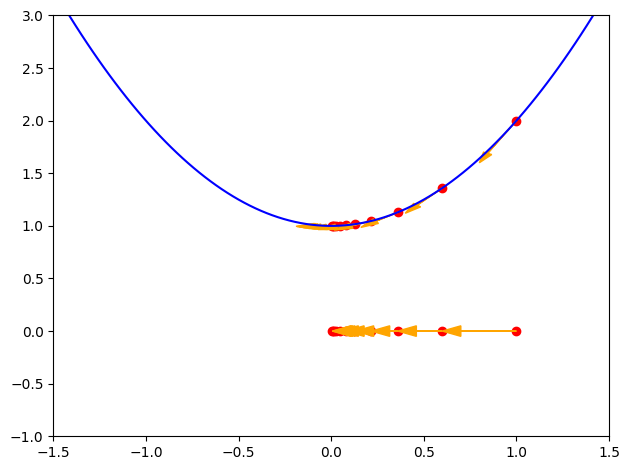

-1

In [4]:
def graphique_descente_ex1(x0,k,d):
    ##inspiré de A. BODIN et F. RECHER    
    xmin, xmax = -1.5*x0, 1.5*x0
    plt.axis([xmin,xmax,-1,x0**2+2])
     
    num = 100
    VX = np.linspace(xmin, xmax, num)
    #1 Graphe de la fonctions
    VY = VX**2+1
    plt.plot(VX,VY,color='blue')

    # 2. Points et gradients sur l'axe
    liste_X, liste_grad = gradDescVect_ex1(x0,k,d)
    for x in liste_X:    # points
        plt.scatter(x, 0, color='red')
    
    for i in range(len(liste_X)-1):    # flèches
        plt.arrow(liste_X[i],0, -d*liste_grad[i],0, linewidth=1, color='orange', length_includes_head=True, head_width=0.1, head_length=0.1)

    # 3. Points et gradients sur le graphe
    for x in liste_X:    # points
        plt.scatter(x, x**2+1, color='red')
    
    for i in range(len(liste_X)-1):    # flèches
        plt.arrow(liste_X[i],liste_X[i]**2+1, -d,-d*liste_grad[i], linewidth=1, color='orange', length_includes_head=True, head_width=0.05, head_length=0.1)


    plt.tight_layout()
    plt.show()
    return -1


graphique_descente_ex1(x0 = 1, k = 10, d = 0.2)

## Exercice 2 : Optimisation d'une fonction dérivable $f$ dont on connait la dérivée $f'$

**Question 1**

1. Ecrire une fonction `gradDesc_ex2(f,fp,x0,k,d)` qui produit le même résultat que <tt>gradDesc_ex1</tt> mais pour une fonction quelconque <tt>f</tt> dont on connait la dérivée <tt>fp</tt>. 

2. Remarquer que les résultats obtenus sont bien les mêmes que pour l'exercice 1

3. Ecrire une fonction `gradDescVect_ex2(f,fp,x0,k,d)` qui produit les mêmes résultats que <tt>gradDescVect_ex1</tt> mais pour une fonction quelconque <tt>f</tt> dont on connait la dérivée <tt>fp</tt>. 

La fonction `graphique_descente_ex2` utilise le résultat de <tt>gradDescVect_ex2</tt> pour donner une représentation graphique de la descente de gradient.

In [5]:
def gradDesc_ex2(f, fp, x0, k, d, verbose = False):
    nb = x0
    for i in range(0, k):
        nb = nb - (d * fp(nb))
    return (nb)

def f(x):
    return (x ** 2 + 1)

def fp(x):
    return (x * 2)


print("Obtient-on les mêmes résultats pour le cas x^2 +1 ?", gradDesc_ex2(f,fp,1,10,0.2, True) == gradDesc_ex1(1,10,0.2, True))

min 0.6 ak 0.6
min 0.36 ak 0.36
min 0.216 ak 0.216
min 0.1296 ak 0.1296
min 0.07776 ak 0.07776
min 0.046655999999999996 ak 0.046655999999999996
min 0.027993599999999997 ak 0.027993599999999997
min 0.016796159999999997 ak 0.016796159999999997
min 0.010077695999999997 ak 0.010077695999999997
min 0.006046617599999998 ak 0.006046617599999998
Obtient-on les mêmes résultats pour le cas x^2 +1 ? True


In [6]:
def gradDescVect_ex2(f,fp,x0,k,d):
    liste_X = []
    liste_grad = []
    
    s1 = x0
    liste_X.append(s1)
    for i in range(k):
        liste_grad.append(fp(s1))
        s1 = s1 - d * fp(s1)
        liste_X.append(s1)
    return liste_X, liste_grad

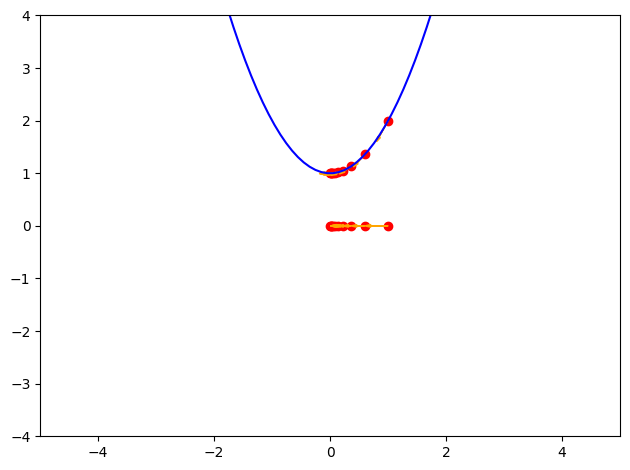

-1

In [7]:
def graphique_descente_ex2(f,fp,x0,k,d):
    ##inspiré de A. BODIN et F. RECHER    
    xmin, xmax = -3*x0, 3*x0
    plt.axis([xmin,xmax,-2,2])
    
    xmin, xmax = -5*x0, 5*x0
    plt.axis([xmin,xmax,-2*f(x0),2*f(x0)])
     
    num = 100
    VX = np.linspace(xmin, xmax, num)
    #1 Graphe de la fonctions
    VY =f(VX)
    plt.plot(VX,VY,color='blue')

    # 2. Points et gradients sur l'axe
    liste_X, liste_grad = gradDescVect_ex2(f,fp,x0,k,d)
    for x in liste_X:    # points
        plt.scatter(x, 0, color='red')
    
    for i in range(len(liste_X)-1):    # flèches
        plt.arrow(liste_X[i],0, -d*liste_grad[i],0, linewidth=1, color='orange', length_includes_head=True, head_width=0.05, head_length=0.1)

    # 3. Points et gradients sur le graphe
    for x in liste_X:    # points
        plt.scatter(x, f(x), color='red')
    
    for i in range(len(liste_X)-1):    # flèches
        plt.arrow(liste_X[i],f(liste_X[i]), -d,-d*liste_grad[i], linewidth=1, color='orange', length_includes_head=True, head_width=0.05, head_length=0.1)

    plt.tight_layout()

    plt.show()
    return -1

graphique_descente_ex2(f,fp,1,10,0.2)

__Question 2 : Exemple de problème d'optimisation__

Un industriel cherche à optimiser la quantité de métal utilisée pour la fabrication d’une boite de conserve. Nous avons vu en début de cours que la surface $S$ de métal utilisée dépendait du rayon $r$ de la boite (nous fixons le volume à 425mL).

$$S(r) = 2\pi r^2 + \frac{2V}{r}$$

En utilisant la descente de gradient et les fonctions définies précédemment, donner une approximation du rayon permettant d'utliser le moins de métal possible pour produire la boite. A quelle surface ce rayon correspond-il ?

In [24]:
def f(x):
    return (2*math.pi*x**2 + 2*425 / x)


def fp(x):
    return ((4*math.pi*x**3 - 2*425) / (x**2))

x0 = 1
k = 20
d = 0.02
rMin = gradDesc_ex2(f, fp, x0, k, d)

print("Le rayon minimal trouvé en", k, "pas est de", rMin)
print("La surface correspondante est égale à", f(rMin))

Le rayon minimal trouvé en 20 pas est de 4.074456521844398
La surface correspondante est égale à 312.92517050456


**Question 3** 

À l'aide des widgets suivant, observer l'influence des paramètres $k$ et $d$. Commentez

In [20]:
from ipywidgets import interact, fixed

def f(x):
    return np.sin(x)

def fp(x):
    return np.cos(x)

interact(graphique_descente_ex2,f=fixed(f),fp=fixed(fp), x0=fixed(1), k=(0, 50, 1), d=(0., .5, 0.005))

interactive(children=(IntSlider(value=25, description='k', max=50), FloatSlider(value=0.25, description='d', m…

<function __main__.graphique_descente_ex2(f, fp, x0, k, d)>

In [21]:
interact(graphique_descente_ex2,f=fixed(f),fp=fixed(fp), x0=fixed(1), k=(0, 50, 1), d=(0., 4, 0.005))

interactive(children=(IntSlider(value=25, description='k', max=50), FloatSlider(value=2.0, description='d', ma…

<function __main__.graphique_descente_ex2(f, fp, x0, k, d)>

__Influence de k :__
Le nombre de points sur le shéma.

__Influence de d :__
Le pas entre les points du shéma.

## Exercice 3 : Cas d'une fonction dont on ne connait pas la dérivée

Le but de cette dernière partie est de proposer un algorithme pour utiliser la méthode du gradient


Pour cela, on utilise :

$$f'(x) = \lim_{t \to 0} \frac{f(x)-f(x+t)}{t} \approx \frac{f(x)-f(x+\varepsilon)}{\varepsilon}$$


_Remarque stabilité numérique :  on prend généralement un petit epsilon que l'on fixe, par exemple $\varepsilon = 10^{-5}$ et l'on symétrise, on choisira donc :_
$$f'(x)  \approx \frac{f(x+\varepsilon)-f(x-\varepsilon)}{2\varepsilon}$$



_Remarque python_ : on pourra utiliser les lambda expressions pour recycler le code précédent https://www.w3schools.com/python/python_lambda.asp 

1. Ecrire une fonction `fp_approx` qui donne l'approximation de la dérivée au point x en utilisant la formule précédente. 

2. Pour la fonction donnée, écrire la fonction `fp` donnant sa dérivée exacte. Comparer les résultats en un point.

3. Faire la descente de gradient en utilisant <tt>fp_approx</tt> pour trouver le minimum

Difference entre la derivée exacte et l'approximation : -5.475229158946604e-10
Minimum 14170.841599405028 trouvé en 11.399999999890497


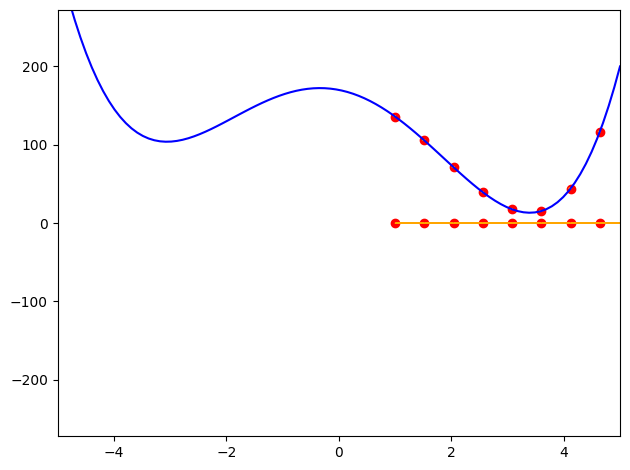

-1

In [14]:
eps = 1e-5

def fp_approx(f, x, eps):
    return ((f(x+eps) - f(x-eps)) / (2*eps))

def f(x):
    return ((x**2 - 11)**2 + (x - 7)**2)

#dérivée -14 - 42*x + 4*x**3
def fp(x):
    return (-14 - 42*x + 4*x**3)


print("Difference entre la derivée exacte et l'approximation :",fp(1)-fp_approx(f, 1, eps))
xMin = gradDesc_ex2(f, lambda x : fp_approx(f, 1, eps), 1, 20, 0.01)

print("Minimum",f(xMin), "trouvé en", xMin)
# min{(x^2 - 11)^2 + (x - 7)^2}≈13.2727 at x≈3.3957

graphique_descente_ex2(f,lambda x : fp_approx(f, 1, eps),1,20,.01)


### Extensions suggérées :


#### Adapatative learning rate :
Dans tous nos exemples, le pas $d$ (appelé taux d'apprentissage en machine learning) reste constant.
Il peut-être intéressant d'adapter le pas pour partir avec des grandes valeurs que l'on dimiunue au fur et à mesure.

Par exemple on peut choisir à l'étape $i$ le pas $d[i] = d[0]/(1+i)$

Tester différentes stratégies d'adaptation du pas et les illustrer par des exemples.




#### Gradient avec inertie (momentum)


L'idée de cette variante est de garder ne mémoire l'étape précédente.


<u>_Methode du gradient avec inertie_</u>


_Inputs_   $f, f', w_0 \in R^d, x_{-1} = x_0$

 
Pour $k = 0, 1, ...$

1. Calculer une taille de pas $\alpha_k > 0$ et un paramètre $\beta_k > 0$
2. Definir le nouveau point comme : $x_{k+1} = x_k − \alpha_k f'(x_k + \beta_k(x_k - x_{k-1})) + \beta_k(x_k - x_{k−1})$ 

Fin

Implémenter cette méthode et la comparer avec la méthode standard dans des exemples.

